In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/test.csv')

In [3]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
2,2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
3,3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
4,4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3001 non-null   int64  
 1   Player       3001 non-null   object 
 2   Span         3001 non-null   object 
 3   Mat          3001 non-null   int64  
 4   Inns         3001 non-null   object 
 5   NO           3001 non-null   object 
 6   Runs         3001 non-null   object 
 7   HS           3001 non-null   object 
 8   Ave          3001 non-null   object 
 9   100          3001 non-null   object 
 10  50           3001 non-null   object 
 11  0            3001 non-null   object 
 12  Unnamed: 11  0 non-null      float64
dtypes: float64(1), int64(2), object(10)
memory usage: 304.9+ KB


In [5]:
df.drop(columns=['Unnamed: 0','Unnamed: 11'],inplace=True)

In [6]:
df.info()
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  3001 non-null   object
 1   Span    3001 non-null   object
 2   Mat     3001 non-null   int64 
 3   Inns    3001 non-null   object
 4   NO      3001 non-null   object
 5   Runs    3001 non-null   object
 6   HS      3001 non-null   object
 7   Ave     3001 non-null   object
 8   100     3001 non-null   object
 9   50      3001 non-null   object
 10  0       3001 non-null   object
dtypes: int64(1), object(10)
memory usage: 258.0+ KB


In [7]:
df['HS']=df['HS'].str.replace('*','',regex=False).replace('-', '0').astype(int)

In [8]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248,53.78,51,68,14
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9


In [9]:
df.describe()

,Mat,HS
count,3001.000000,3001.000000
mean,17.427191,68.546818
std,24.954654,67.022408
min,1.000000,0.000000
25%,2.000000,18.000000
50%,7.000000,46.000000
75%,21.000000,102.000000
max,200.000000,400.000000


In [10]:
df['Runs'] = df['Runs'].replace('-', '0').astype(int)

In [11]:
top_runs =df.sort_values('Runs',ascending=False).head(10)

In [12]:
top_runs[['Player','Runs']]

,Player,Runs
0,SR Tendulkar (INDIA),15921
1,RT Ponting (AUS),13378
2,JH Kallis (ICC/SA),13289
3,R Dravid (ICC/INDIA),13288
4,AN Cook (ENG),12472
5,KC Sangakkara (SL),12400
6,BC Lara (ICC/WI),11953
7,S Chanderpaul (WI),11867
8,DPMD Jayawardene (SL),11814
9,AR Border (AUS),11174


In [13]:
df[['start_year', 'end_year']] = df['Span'].str.split('-', expand=True).astype(int)
df['decade'] = (df['start_year'] // 10) * 10
runs_by_decade = df.groupby('decade')['Runs'].sum().sort_values(ascending=True)
display(runs_by_decade)

,Runs
decade,
1870,7063
1910,14191
1880,21253
1900,37471
1890,39201
1930,73480
1940,74254
1920,77348
1950,167847


In [14]:
df['100'] = df['100'].replace('-', '0').astype(int)

In [15]:
df.sort_values('100',ascending=False)[['Player','100']].head(10)

,Player,100
0,SR Tendulkar (INDIA),51
2,JH Kallis (ICC/SA),45
1,RT Ponting (AUS),41
5,KC Sangakkara (SL),38
3,R Dravid (ICC/INDIA),36
11,SM Gavaskar (INDIA),34
12,Younis Khan (PAK),34
6,BC Lara (ICC/WI),34
8,DPMD Jayawardene (SL),34
4,AN Cook (ENG),33


In [16]:
df['Ave'] = df['Ave'].replace('-', '0').astype(float)
df['Inns'] = df['Inns'].replace('-', '0').astype(int)

In [17]:
df[df['Inns']>=50].sort_values('Ave',ascending=False)[['Player','Ave']].head(10)

,Player,Ave
52,DG Bradman (AUS),99.94
47,SPD Smith (AUS),62.84
103,H Sutcliffe (ENG),60.73
56,KF Barrington (ENG),58.67
110,ED Weekes (WI),58.61
42,WR Hammond (ENG),58.45
28,GS Sobers (WI),57.78
5,KC Sangakkara (SL),57.40
84,JB Hobbs (ENG),56.94
144,CL Walcott (WI),56.68


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2317815942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_runs, x='Player', y='Runs', palette='viridis')


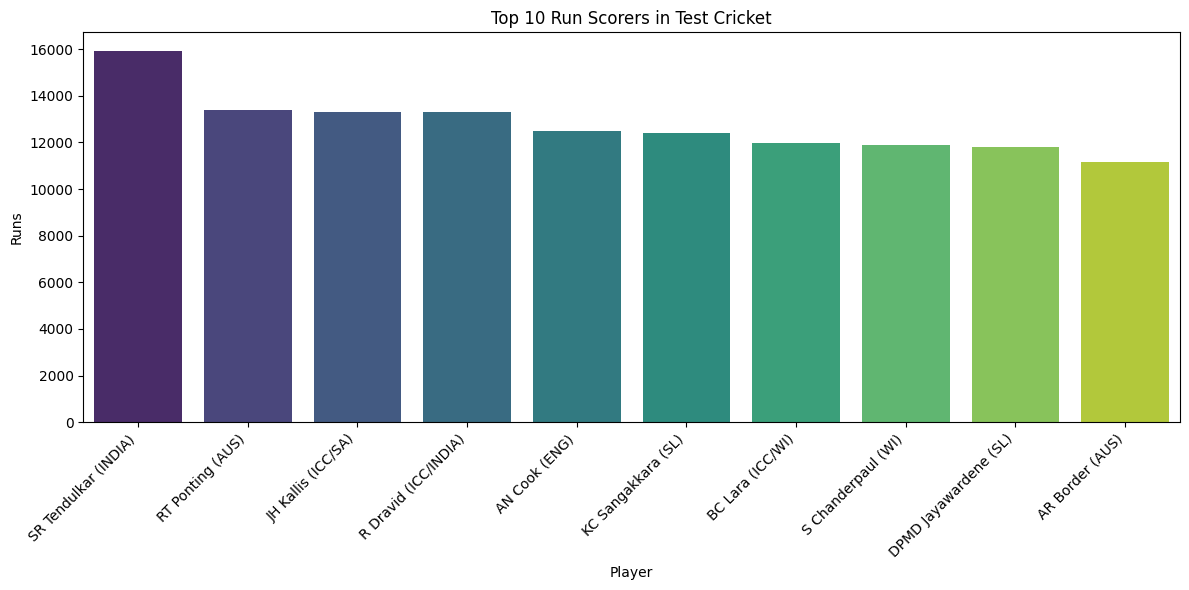

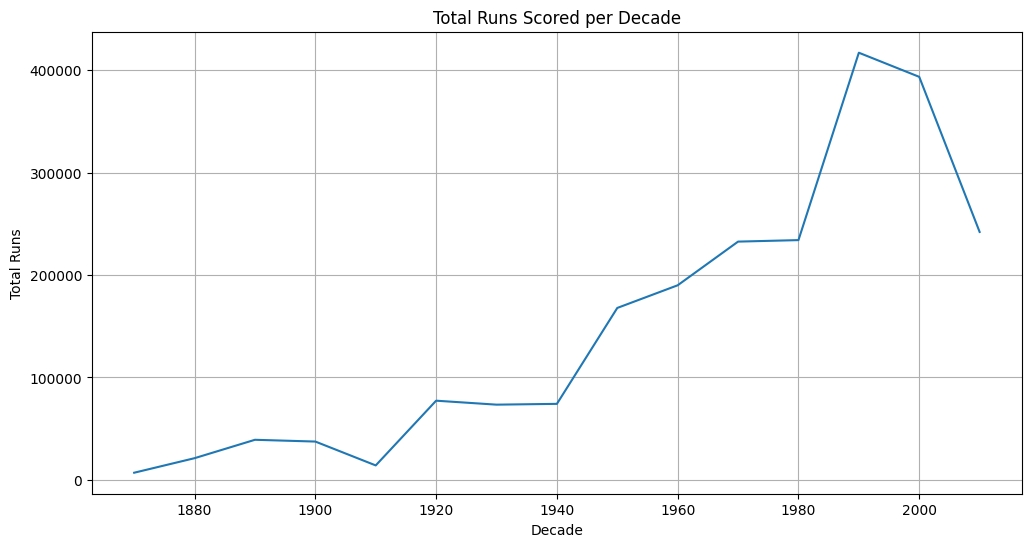

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_runs, x='Player', y='Runs', palette='viridis')
plt.title('Top 10 Run Scorers in Test Cricket')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=runs_by_decade)
plt.title('Total Runs Scored per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

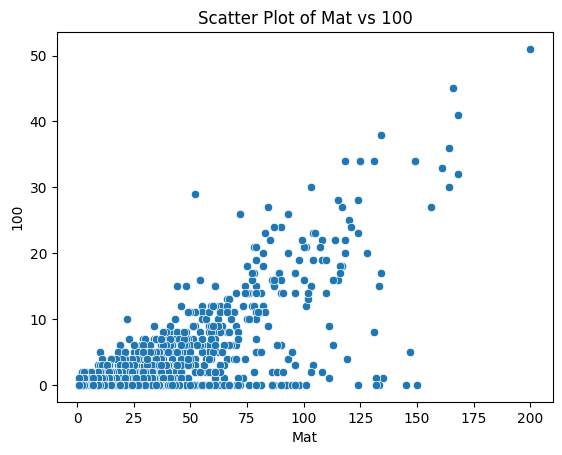

In [20]:
sns.scatterplot(data=df,x='Mat',y='100')
plt.title('Scatter Plot of Mat vs 100')
plt.xlabel('Mat')
plt.ylabel('100')
plt.show()

In [24]:
df[['Player', 'Region']] = df['Player'].str.split('(', n=1, expand=True)


In [25]:
df['Region'] = df['Region'].str.replace(')', '',regex=False)

In [26]:
df['Region'] = df['Region'].str.replace('ICC/','',regex=False)

In [27]:
df.Region.head(20)

,Region
0,INDIA
1,AUS
2,SA
3,INDIA
4,ENG
5,SL
6,WI
7,WI
8,SL
9,AUS


In [28]:
df.groupby('Region')['Runs'].mean().sort_values(ascending=False)

,Runs
Region,
AUS/SA,2788.000000
ENG/ICC,2294.000000
SL,911.866667
AUS,900.022124
INDIA,881.291096
PAK,837.093220
WI,800.636364
NZ,691.083333
ENG,677.574561


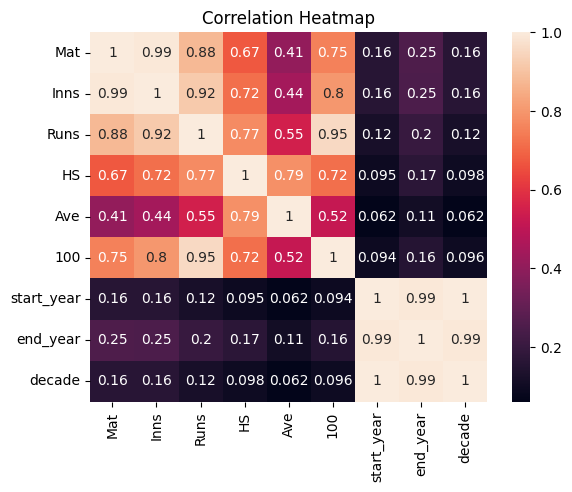

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.pivot_table(values='Runs',index='Player',columns='Region',aggfunc='sum')

Region,3 (PAK,AFG,AUS,AUS/ENG,AUS/SA,BDESH,ENG,ENG/ICC,ENG/INDIA,ENG/IRE,...,INDIA/PAK,IRE,NZ,NZ/WI,PAK,SA,SA/ZIM,SL,WI,ZIM
Player,,,,,,,,,,,,,,,,,,,,,
A Bacher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,679.0,NaN,NaN,NaN,NaN
A Balbirnie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Brown,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Chopra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Coningham,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zubayr Hamza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,146.0,NaN,NaN,NaN,NaN
Zulfiqar Ahmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
Zulfiqar Babar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN


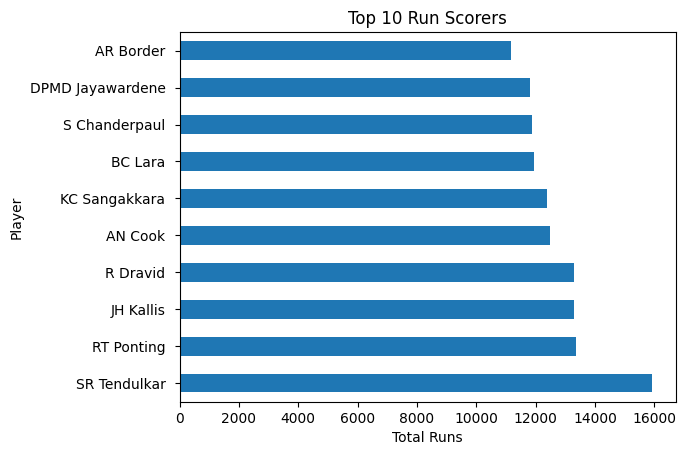

In [31]:
top_players=df.groupby('Player')['Runs'].sum().sort_values(ascending=False).head(10)
top_players.plot(kind='barh')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

In [32]:
df['FiftyPlus'] = df['Runs'] >= 50

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['Ave']]  # or add more features
y = df['FiftyPlus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred= model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}')

Accuracy of the Logistic Regression model: 0.84


In [35]:
new_data=[[45.6]]
model.predict(new_data)

model.predict_proba(new_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[5.36240654e-04, 9.99463759e-01]])

In [36]:
player=[[52.3]]

prediction= model.predict(player)

if prediction[0]==1:
  print("the player is likely to score 50+ runs")
else:
  print("the player is unlikely to score 50+ runs")

the player is likely to score 50+ runs


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


```markdown
**My Test Cricket Run Predictor Project: A Quick Overview**

So, for this project, I basically built a little program that tries to guess if a cricket player is going to score 50 or more runs in a Test match. It was pretty cool to see how data science can be applied to sports!

**What I Did:**
1.  **Got the Data Ready**: First, I grabbed a bunch of cricket stats from a CSV file. Then, I cleaned it up – got rid of some weird extra columns, changed text like 'runs' and 'averages' into numbers so my computer could understand them, and even figured out which decade each player was active in and where they were from.
2.  **Looked at the Data (EDA)**: This was the fun part! I checked out who the top scorers were (Tendulkar, Ponting – legends!), saw when most runs were scored over the decades (the 90s and 2000s were big!), and noticed that players who played more matches also tended to hit more centuries. I also poked around to see how different regions performed.
3.  **Built the Predictor**: I created a 'yes' or 'no' question: 'Did the player score 50+ runs?' Then, I used their batting average as the main clue to train a Logistic Regression model. It's like teaching the computer to spot patterns.
4.  **Checked How Good It Was**: My model ended up being about **84% accurate**! That means it was right about 84 out of 100 times when predicting if someone would get 50+ runs.
5.  **Made a Prediction**: Finally, I fed it some new info (like a player's average) and it told me if they were likely to get 50+ runs. Pretty neat!

**My Key Takeaways (What I Learned):**
*   **Average Matters a LOT**: Turns out, a player's batting average is super important for guessing if they'll hit a big score. It's the strongest signal!
*   **Legends are Legends for a Reason**: The stats really back up why guys like Tendulkar are considered GOATs – they consistently top the charts.
*   **Cricket Changes Over Time**: The game isn't static; run-scoring trends have definitely shifted across different decades.
*   **More Games = More Milestones**: Simple but true: the longer a player's career, the more chances they get to rack up centuries.

Overall, it was a great way to see how statistical models can help us understand and even predict things in cricket!